In [69]:
import scipy.integrate as inte 
import numpy as np 
import scipy.optimize as op
import math 
import matplotlib.pyplot as plt
import emcee
import corner

<ErrorbarContainer object of 3 artists>

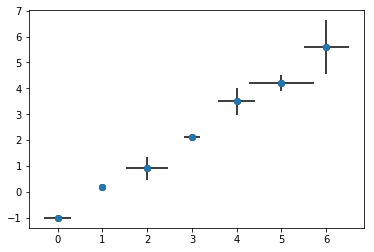

In [70]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([-1, 0.2, 0.9, 2.1, 3.5, 4.2, 5.6])
x_err=np.random.normal(0,0.3,len(x))  #(media,sigma,numero de datos)
y_err=np.random.normal(0,0.4,len(y))
plt.plot(x,y,'o',color='black')
plt.errorbar(x,y,yerr=y_err,xerr=x_err, fmt='o',ecolor='black')

In [87]:
def modelo(x,a,b):   #se define una funcion y que depende de las variables x,a,b
    return a*x+b    #se escribe la forma de la funcion

In [88]:
def lnlike(theta):
    a,b =theta
    lolike=-0.5*(np.sum((y-modelo(x,a,b))**2/y_err**2-np.log(2*np.pi*y_err**2)))
    return lolike

In [89]:
def lnprior(a,b):
    if ((0. < a <2.5) and (-5. < b < 5.)):
        return 0.
    else:
        return -np.infty
    return

In [90]:
def lnpro(a,b,x,y,y_err):
    lp=lnprior(a,b)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(a,b, x, y, y_err)

In [91]:
a0=0.3
b0=0.1

In [92]:
nparametros, ncaminadores = 2, 10
pos = [np.random.randn(nparametros) for i in range(ncaminadores)]

In [93]:
sampler = emcee.EnsembleSampler(ncaminadores, nparametros, lnlike)

In [94]:
sampler.run_mcmc(pos, 10000)

(array([[ 1.11928572, -0.98631747],
        [ 1.12581748, -0.97784701],
        [ 1.1284303 , -0.98304816],
        [ 1.11018847, -0.98743995],
        [ 1.11005563, -0.97262421],
        [ 1.11331175, -0.97598194],
        [ 1.13392355, -0.97975116],
        [ 1.10074526, -0.97988085],
        [ 1.09927555, -0.96291108],
        [ 1.10322256, -0.98106239]]),
 array([-29.17943783, -29.08552274, -29.14230957, -29.87821574,
        -28.95175414, -28.8412203 , -29.68221426, -29.93506026,
        -29.89422379, -29.77016046]),
 ('MT19937', array([2034729946, 3511040325, 2682692100, 2446428459, 1853812271,
          645104449, 2940023806,  425536138,  537571691, 2886663054,
         3169530763, 4208329953,  637127272, 2116615494, 3950363805,
         3348427209, 3643495541, 1141595279, 1861068223,   57400517,
         3504241345, 1242317565, 1510777023, 2444715388, 2654039524,
          778089216, 1886597934, 3840689402, 1289984622,  455431719,
         2579089717, 1812171379,  151906364,  9

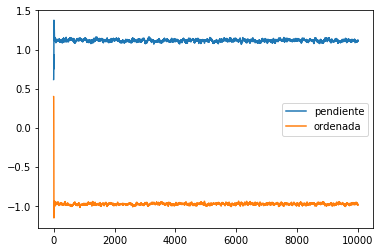

In [95]:
plt.plot(sampler.chain[0,:,0], label='pendiente')
plt.plot(sampler.chain[0,:,1], label='ordenada')
plt.legend()

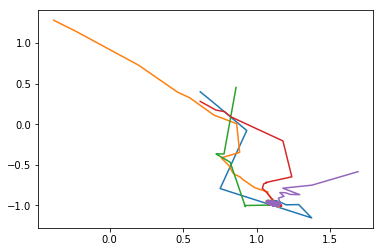

In [99]:
plt.plot(sampler.chain[0,:,0], sampler.chain[0,:,1])
plt.plot(sampler.chain[1,:,0], sampler.chain[1,:,1])
plt.plot(sampler.chain[5,:,0], sampler.chain[5,:,1])
plt.plot(sampler.chain[7,:,0], sampler.chain[7,:,1])
plt.plot(sampler.chain[9,:,0], sampler.chain[9,:,1])

In [106]:
samples = sampler.chain[:, 50:, :].reshape((-1, nparametros))

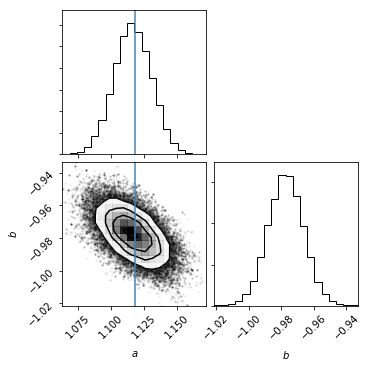

In [111]:
fig = corner.corner(samples, labels=["$a$", "$b$"], truths=[1.118, -1.12])